In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\NEERAJ\Downloads\My Projects\Etlhive Project\hockey.csv")

## *Checking the basic info of the Dataframe*

In [4]:
df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [5]:
# Checking the shape of the Dataframe
df.shape

(582, 9)

In [6]:
# Checking the coulumn names
df.columns

Index(['Team Name', 'Year', 'Wins', 'Losses', 'OT Losses', 'Win %',
       'Goals For (GF)', 'Goals Against (GA)', '+ / -'],
      dtype='object')

In [7]:
# Chicking the information of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team Name           582 non-null    object 
 1   Year                582 non-null    int64  
 2   Wins                582 non-null    int64  
 3   Losses              582 non-null    int64  
 4   OT Losses           358 non-null    float64
 5   Win %               582 non-null    float64
 6   Goals For (GF)      582 non-null    int64  
 7   Goals Against (GA)  582 non-null    int64  
 8   + / -               582 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 41.1+ KB


## *Cleaning the Dataframe and (Remove duplicates, Drop Missing Values column etc.)*

In [9]:
## First we check the null values in the dataset
df.isnull().sum()

Team Name               0
Year                    0
Wins                    0
Losses                  0
OT Losses             224
Win %                   0
Goals For (GF)          0
Goals Against (GA)      0
+ / -                   0
dtype: int64

#### *We can see the there are 224 missing value in OT Losses* 

In [10]:
## Here we see the missing percentage of the dataset
df.isnull().sum() *100 / len(df)

Team Name              0.000000
Year                   0.000000
Wins                   0.000000
Losses                 0.000000
OT Losses             38.487973
Win %                  0.000000
Goals For (GF)         0.000000
Goals Against (GA)     0.000000
+ / -                  0.000000
dtype: float64

In [11]:
# Checking the Dupluicated value in the dataframe
df.duplicated().sum()

0

#### *No duplicated values found in the Dataframe*

In [12]:
df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


## *Each Team the Total Amount of Wins*

Text(0, 0.5, 'Total Win')

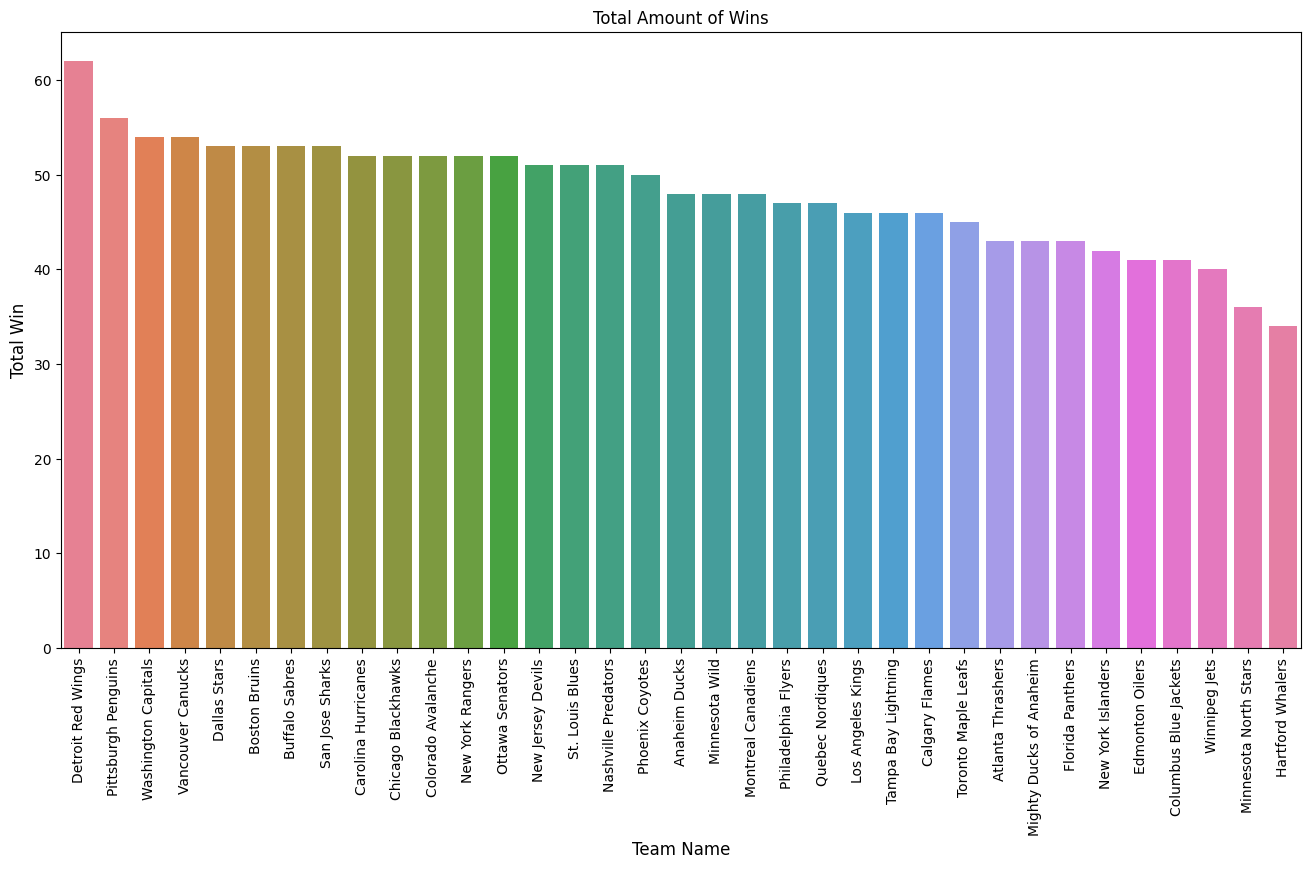

In [105]:
max = df.groupby(['Team Name'])['Wins'].max().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,8))
sns.barplot(data=max, x="Team Name", y='Wins',hue='Team Name')
plt.xticks(ticks=None,rotation=90)
plt.title('Total Amount of Wins')
plt.xlabel("Team Name",fontsize = 12)
plt.ylabel("Total Win",fontsize = 12)

## *Top 5 Teams with Highest Win Percentage*

In [94]:
top_5_teams = df.groupby(['Team Name'])['Win %'].sum().sort_values(ascending=False)[0:5].reset_index()

In [95]:
top_5_teams

,Team Name,Win %
0,Detroit Red Wings,12.306
1,New Jersey Devils,11.221
2,Pittsburgh Penguins,10.475
3,Philadelphia Flyers,10.436
4,Boston Bruins,10.183


Text(0, 0.5, 'Win Percentage')

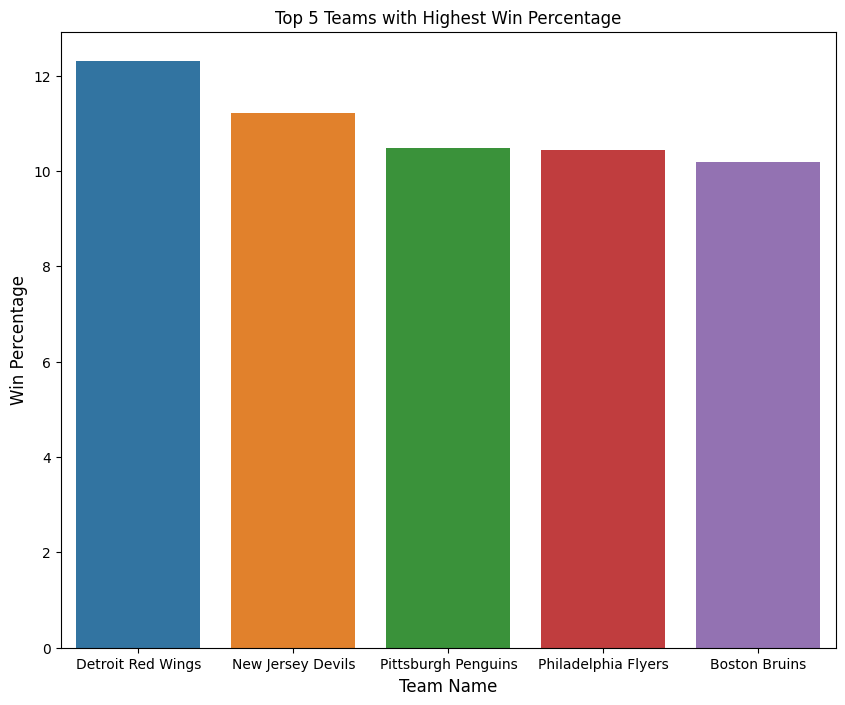

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_5_teams, x="Team Name", y='Win %',hue='Team Name')
plt.title('Top 5 Teams with Highest Win Percentage')
plt.xlabel("Team Name",fontsize = 12)
plt.ylabel("Win Percentage",fontsize = 12)

# Perfoming the Exploratry Data Analysis On the Dataset

### Checking the Descriptive statistics of Dataframe 

In [111]:
con = df.select_dtypes(include="number").columns
cat = df.select_dtypes(exclude='number').columns

In [116]:
con

Index(['Year', 'Wins', 'Losses', 'OT Losses', 'Win %', 'Goals For (GF)',
       'Goals Against (GA)', '+ / -'],
      dtype='object')

In [114]:
df[con].describe()

,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
count,582.000000,582.000000,582.000000,358.000000,582.000000,582.000000,582.000000,582.000000
mean,2000.907216,36.943299,32.353952,7.460894,0.458519,234.063574,234.063574,0.000000
std,6.330674,8.926081,8.411439,3.610191,0.102237,40.548915,42.510718,45.277458
min,1990.000000,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000
25%,1996.000000,31.000000,27.000000,5.000000,0.390000,211.000000,207.000000,-27.000000
50%,2001.000000,38.000000,31.000000,7.000000,0.463000,231.000000,232.500000,4.000000
75%,2007.000000,43.000000,37.000000,10.000000,0.534000,254.000000,258.750000,31.000000
max,2011.000000,62.000000,71.000000,18.000000,0.756000,369.000000,414.000000,144.000000


In [117]:
cat

Index(['Team Name'], dtype='object')

In [115]:
df[cat].describe()

,Team Name
count,582
unique,35
top,Boston Bruins
freq,21


### Univariate Analysis 

<Axes: title={'center': 'Countplot for Team Name'}, xlabel='Team Name'>

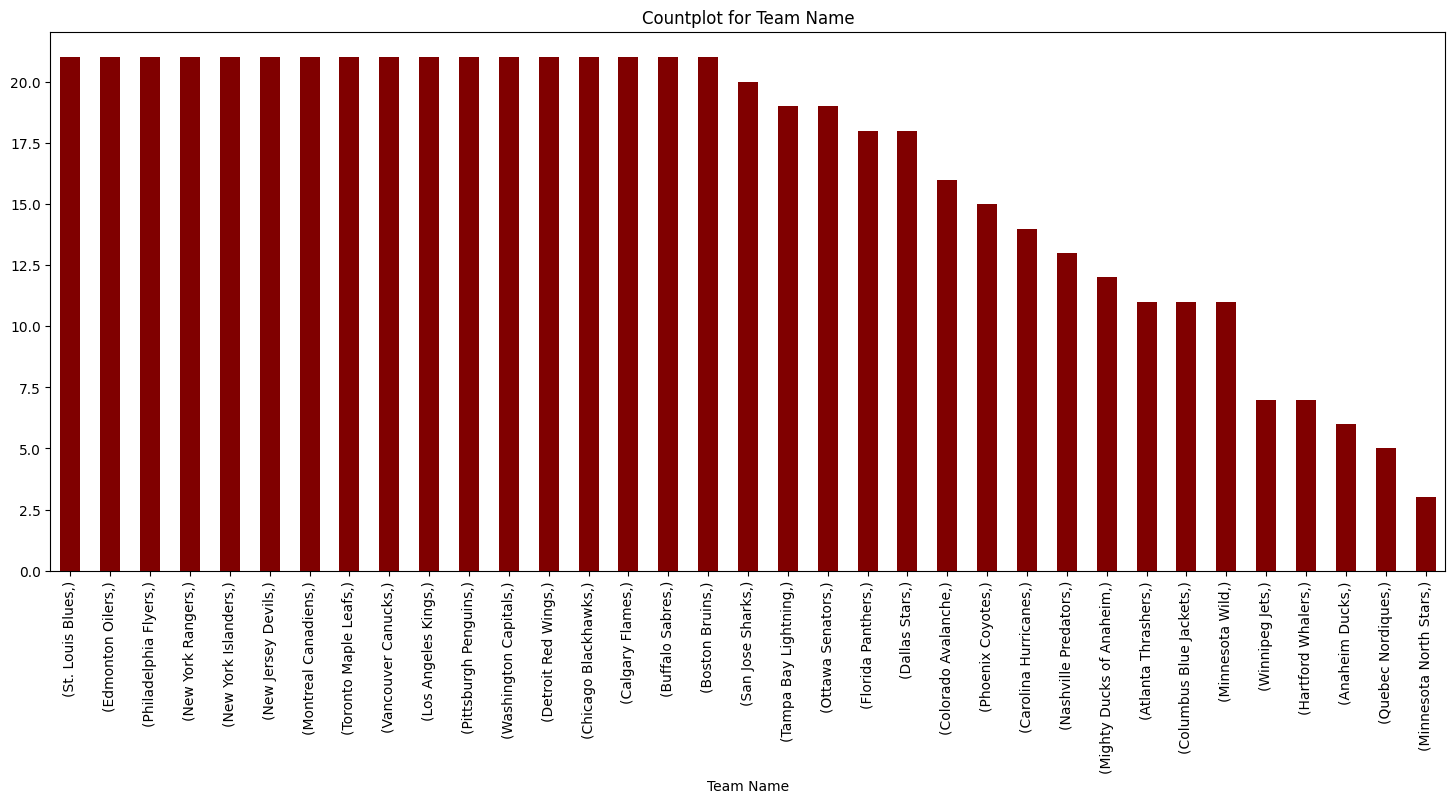

In [148]:
plt.figure(figsize =(18, 7))
df[cat].value_counts(ascending=False).plot(kind='bar',title=f'Countplot for Team Name',color ='maroon')

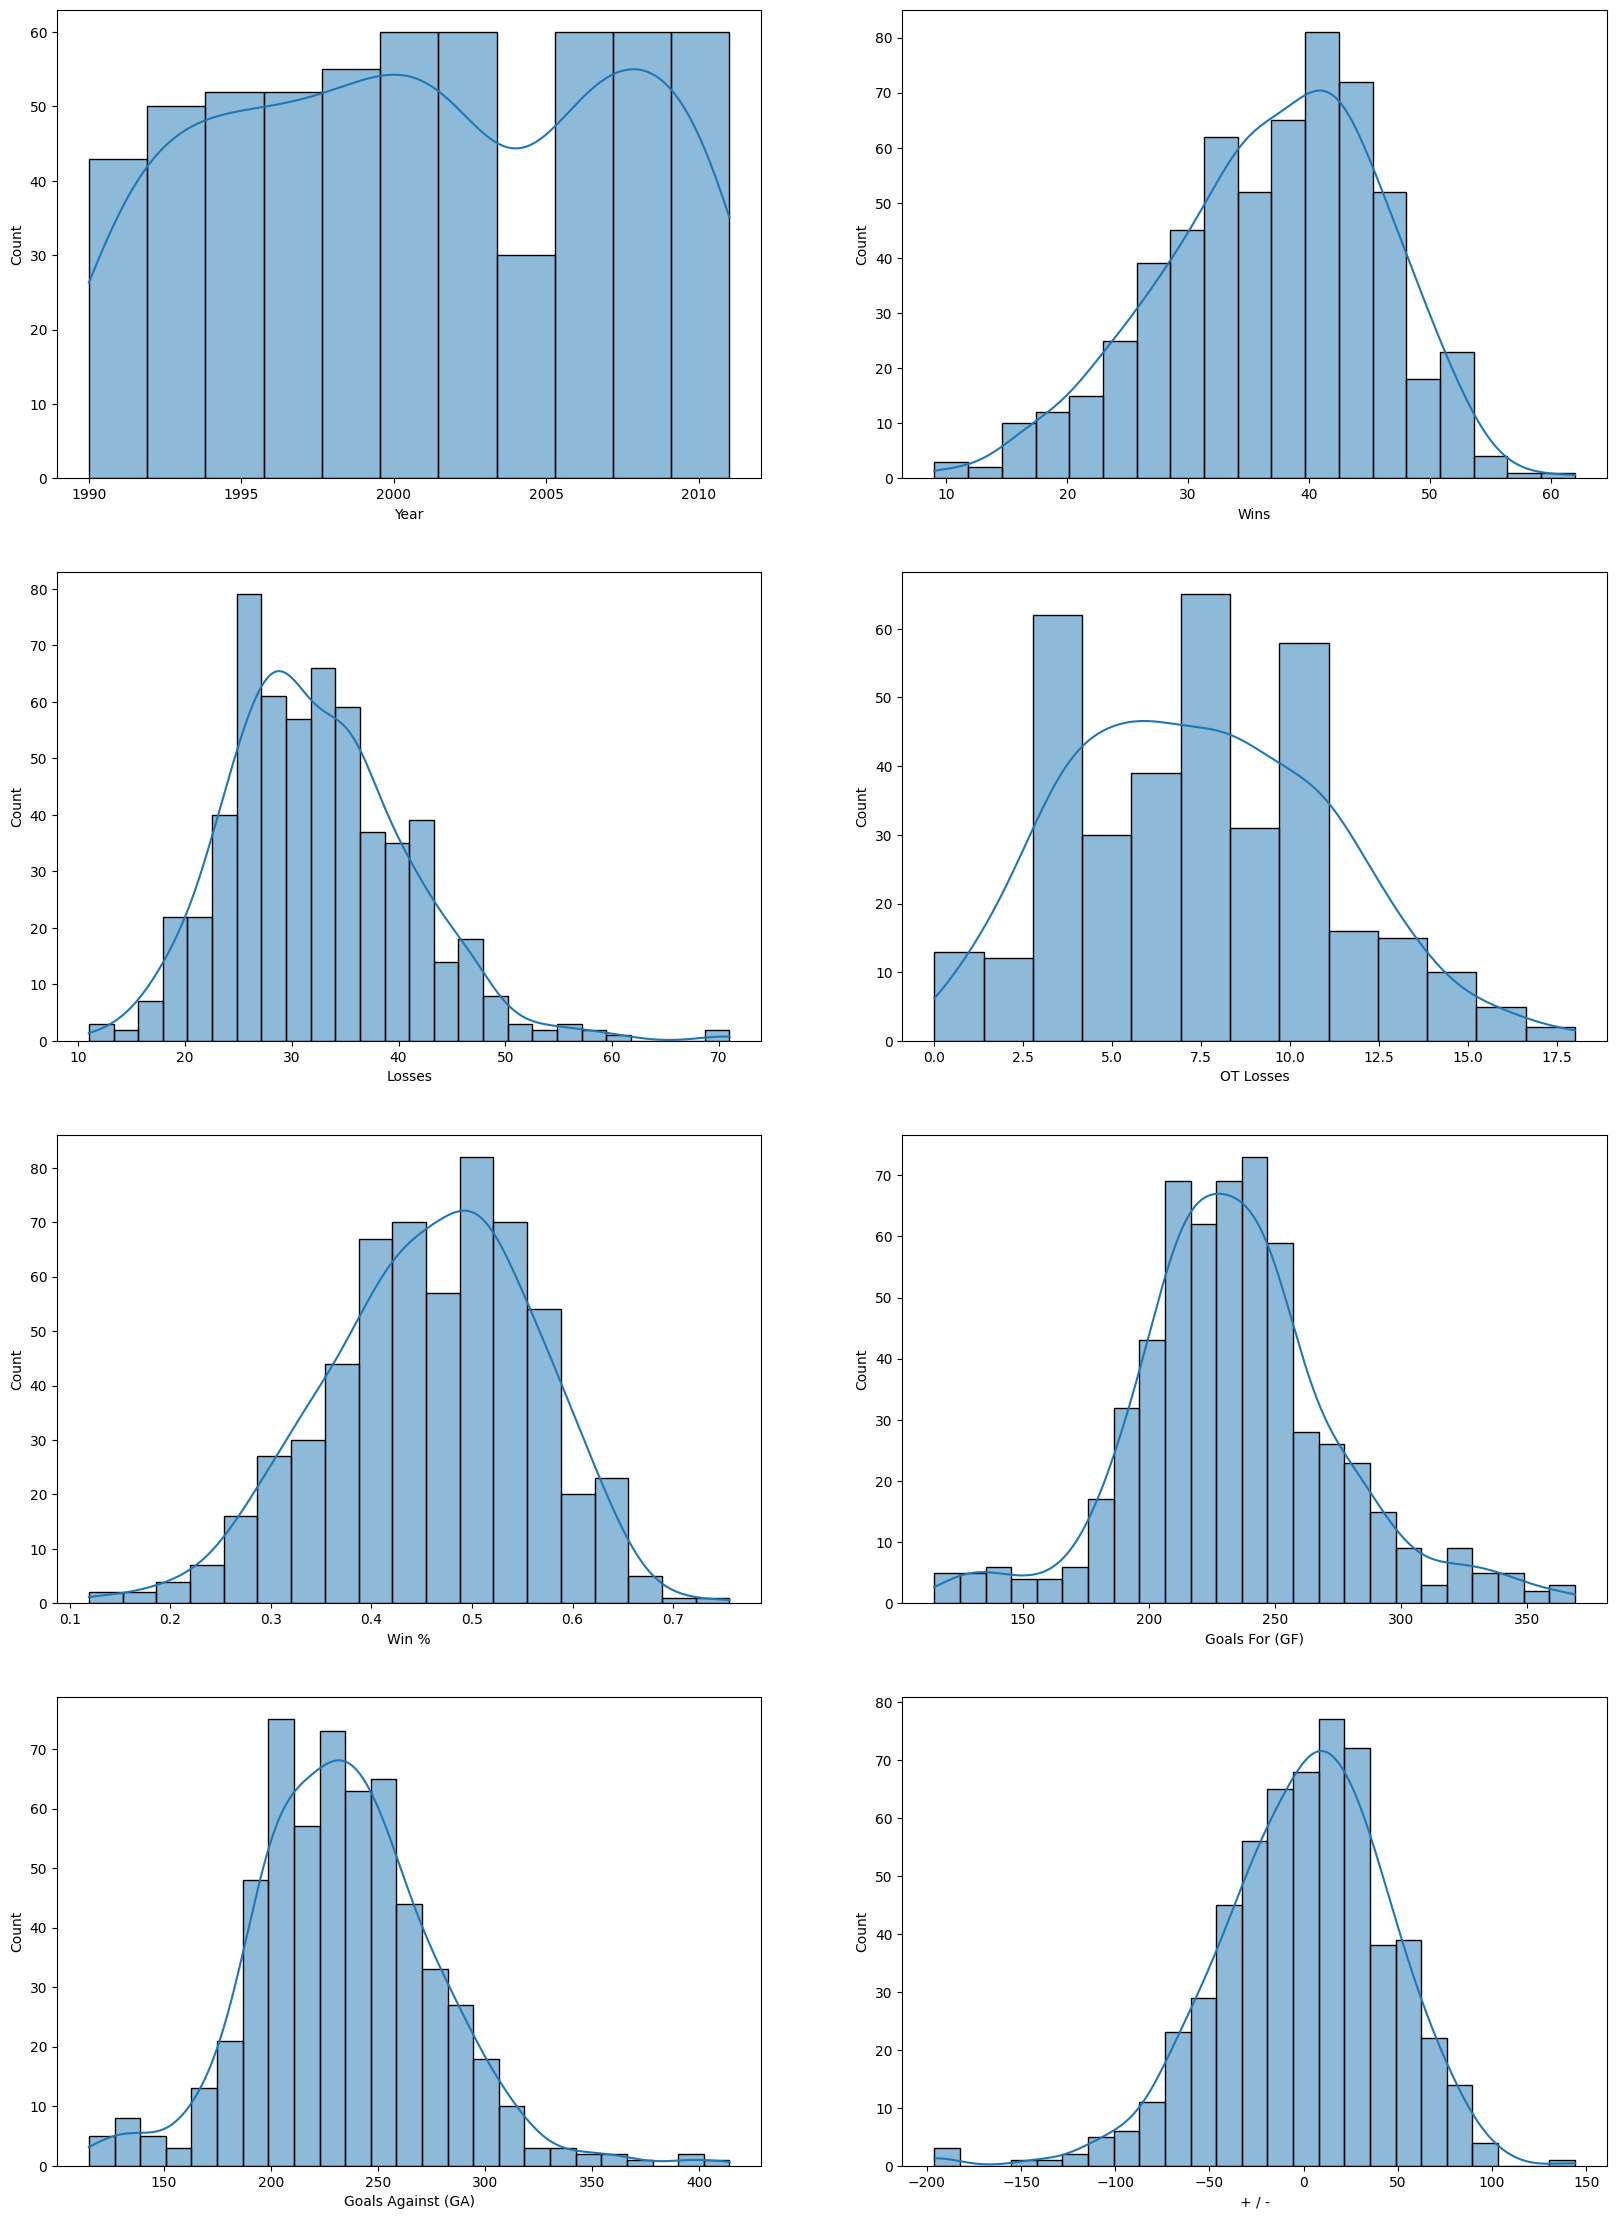

In [157]:
plt.figure(figsize=(20,28))
x= 1

for i in con:
    plt.subplot(4,2,x)
    x += 1
    sns.histplot(data=df,x=i, kde=True)
plt.show()

# Bivariate analyis

In [169]:
corr = df.corr(numeric_only=True)
corr

,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
Year,1.000000e+00,0.319328,-0.131710,0.663957,0.252317,-0.198979,-0.189797,7.092798e-16
Wins,3.193284e-01,1.000000,-0.668429,-0.018299,0.932683,0.615321,-0.289241,8.226265e-01
Losses,-1.317101e-01,-0.668429,1.000000,0.014863,-0.831878,-0.192856,0.740946,-8.683843e-01
OT Losses,6.639567e-01,-0.018299,0.014863,1.000000,-0.018053,0.091381,0.295333,-1.529663e-01
Win %,2.523170e-01,0.932683,-0.831878,-0.018053,1.000000,0.480057,-0.487020,8.871824e-01
Goals For (GF),-1.989795e-01,0.615321,-0.192856,0.091381,0.480057,1.000000,0.406473,5.139300e-01
Goals Against (GA),-1.897969e-01,-0.289241,0.740946,0.295333,-0.487020,0.406473,1.000000,-5.748704e-01
+ / -,7.092798e-16,0.822627,-0.868384,-0.152966,0.887182,0.513930,-0.574870,1.000000e+00


Text(0.5, 1.0, 'Heatmap For the Correlation')

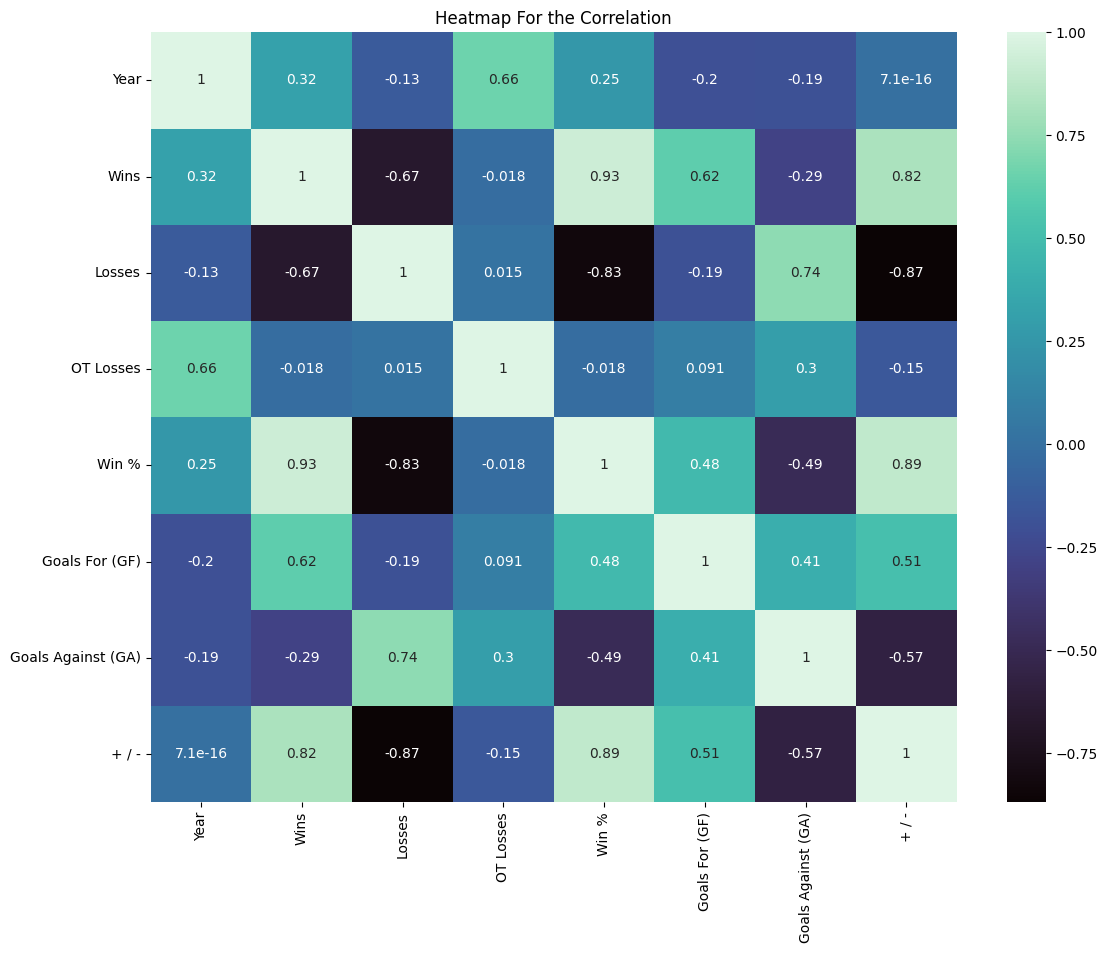

In [190]:
plt.figure(figsize=(13,10))
colormap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(data=corr,annot=True, cmap=colormap)
plt.title('Heatmap For the Correlation')

## Maltivariate analysis

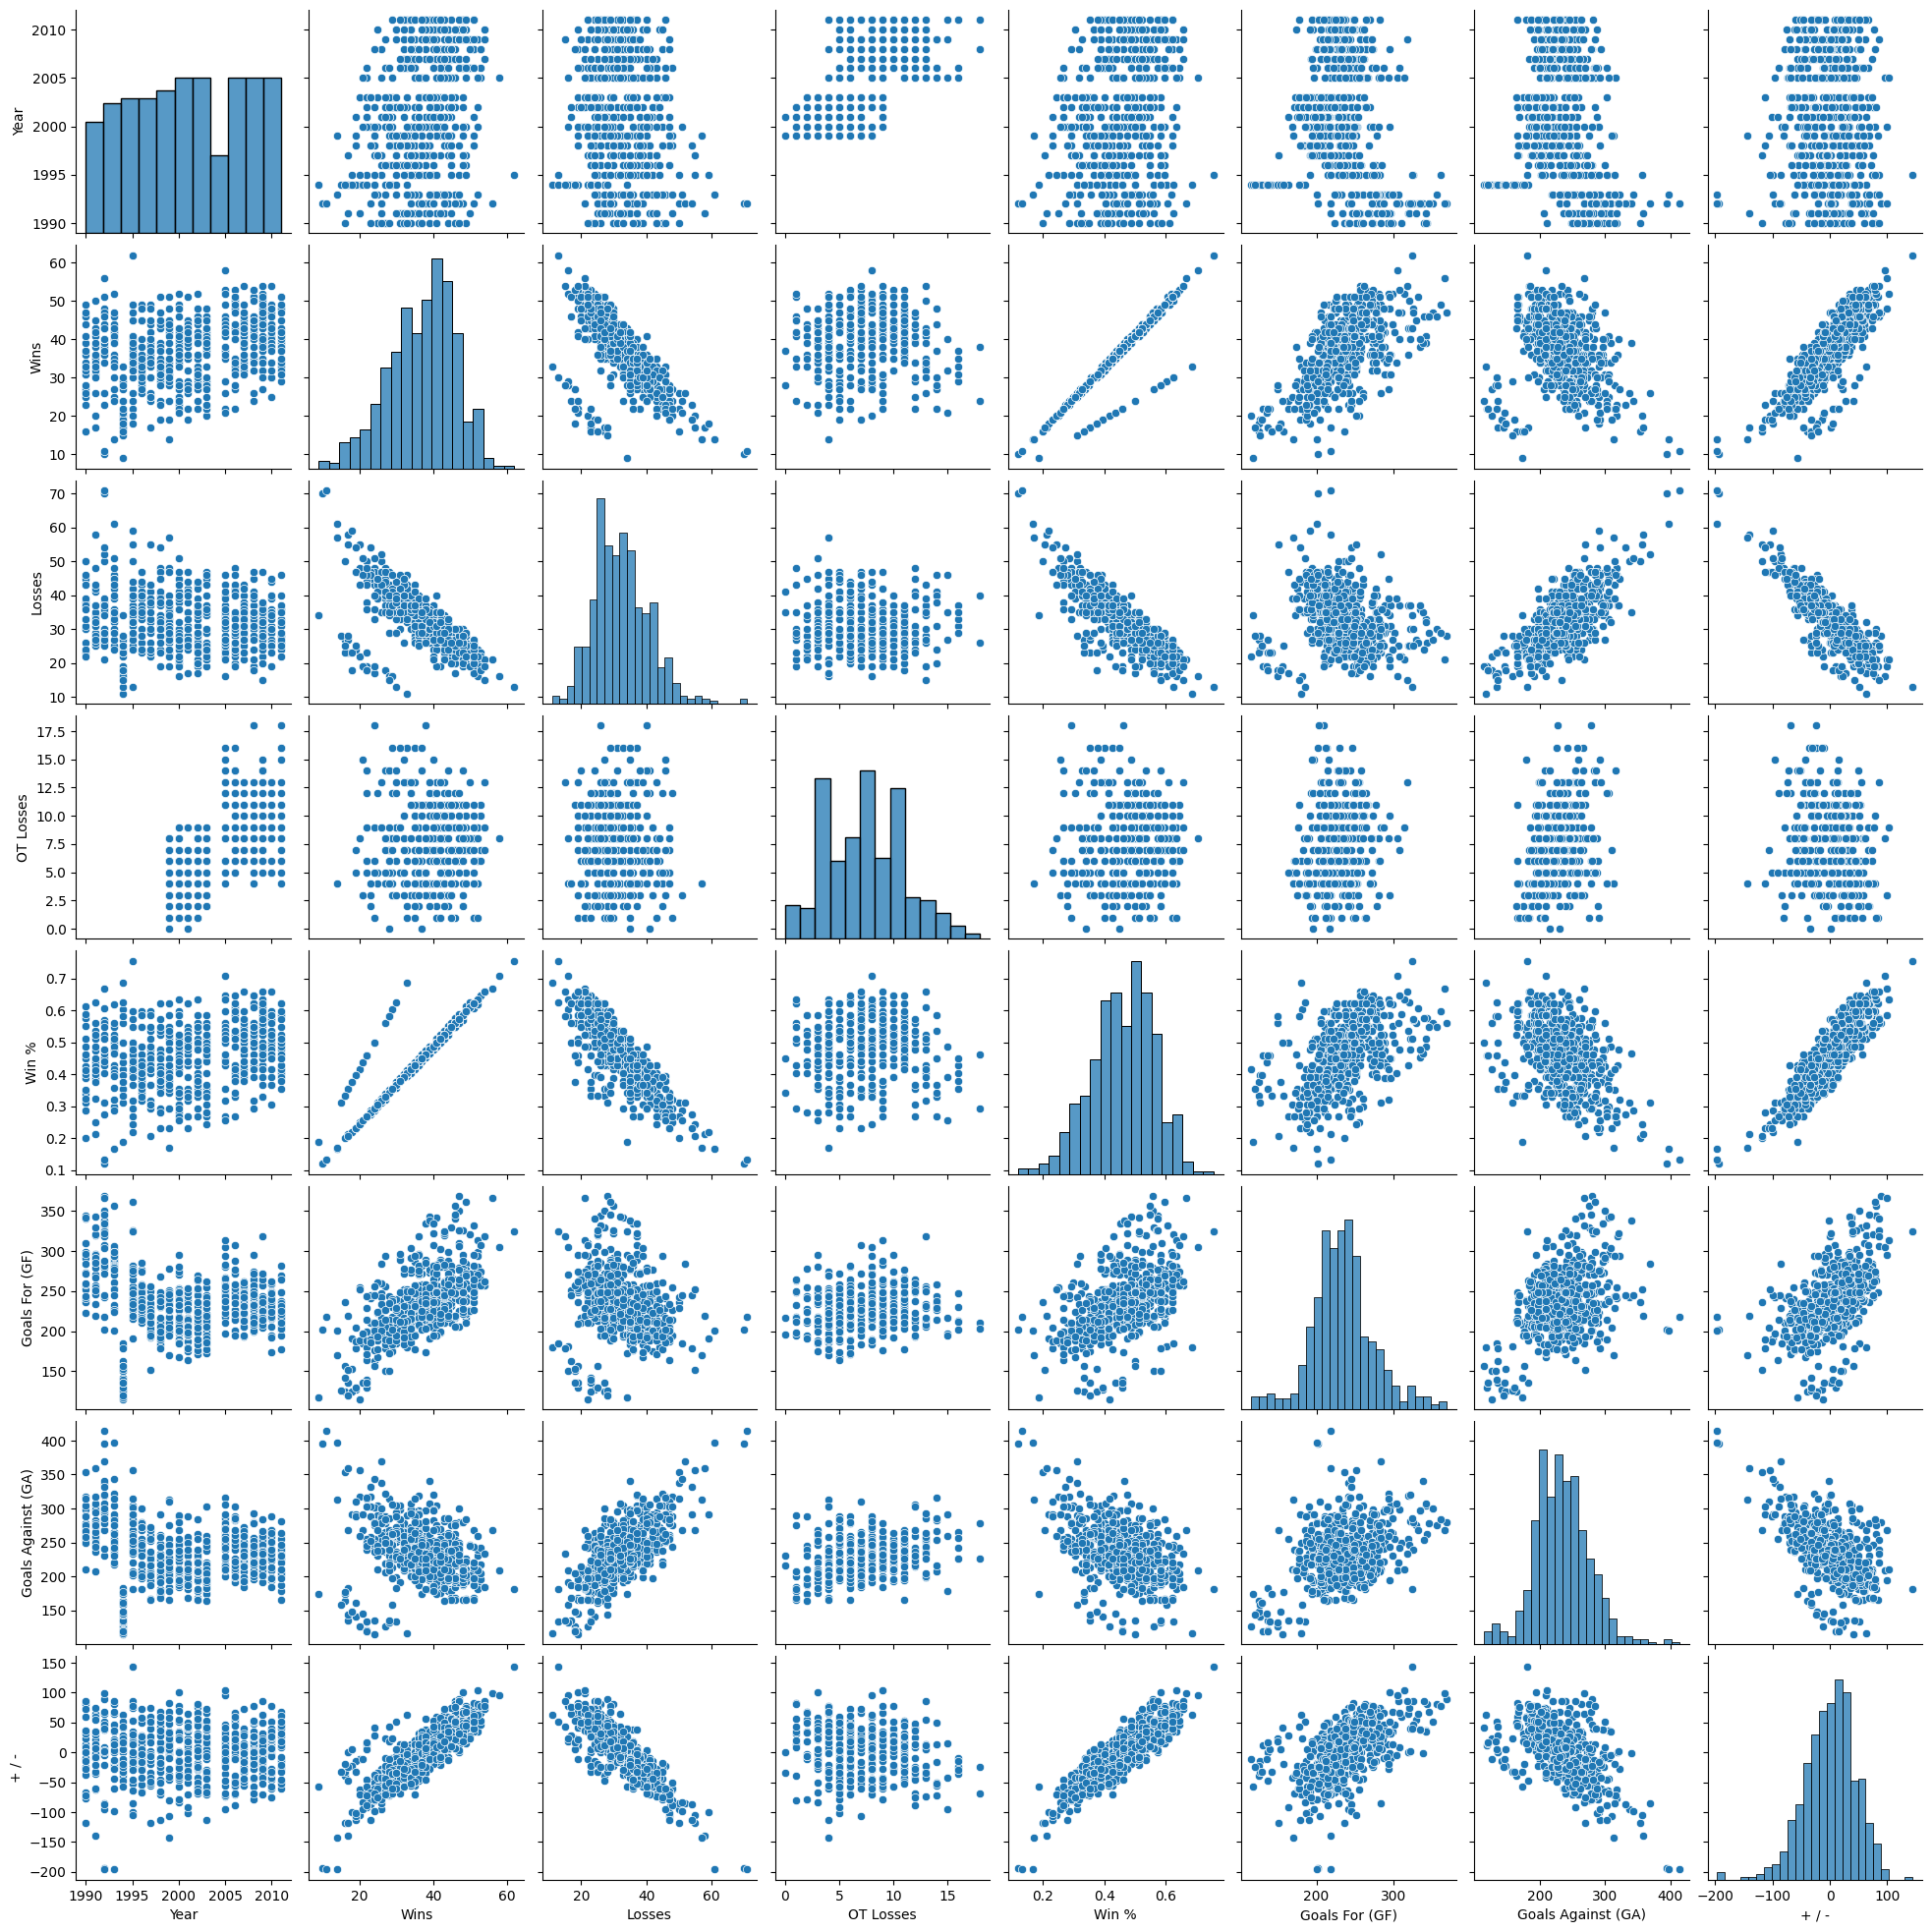

In [193]:
sns.pairplot(data=df)